In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pdp
from scripts.project_functions import data_processing
df = pd.read_csv("Medical_Cost.csv")


In [78]:
df = data_processing("Medical_Cost.csv")

In [25]:
df

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,54,female,47.410,0,yes,southeast,63770.42801
1,45,male,30.360,0,yes,southeast,62592.87309
2,52,male,34.485,3,yes,northwest,60021.39897
3,31,female,38.095,1,yes,northeast,58571.07448
4,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
1333,18,male,34.100,0,no,southeast,1137.01100
1334,18,male,33.660,0,no,southeast,1136.39940
1335,18,male,33.330,0,no,southeast,1135.94070
1336,18,male,30.140,0,no,southeast,1131.50660


In [62]:
df.drop(df[(df.age < 20) | (df.age > 50)].index)
#df = df.drop(df[(df.score < 50) & (df.score > 20)].index)

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
...,...,...,...,...,...,...,...
1326,42,female,32.870,0,no,northeast,7050.02130
1328,23,female,24.225,2,no,northeast,22395.74424
1331,23,female,33.400,0,no,southwest,10795.93733
1333,50,male,30.970,3,no,northwest,10600.54830


In [30]:
#sns.countplot(x = 'children', data = df, hue = 'smoker')
#df1 = df.groupby('smoker')['charges'].sum()
#df1
#sns.countplot(hue= 'smoker', x = 'charges', data = df)
df1 = df.loc[(df['Smoker']) == 'yes']
print(df1['Charges'].count())
print(df1['Charges'].sum())
print(df1['Charges'].mean())

274
8781763.521839999
32050.23183153284


In [29]:
df1 = df.loc[(df['Smoker']) == 'no']
print(df1['Charges'].count())
print(df1['Charges'].sum())
print(df1['Charges'].mean())

1064
8974061.468919
8434.268297856202


In [31]:
df1 = df.groupby(['Smoker','Charges'])

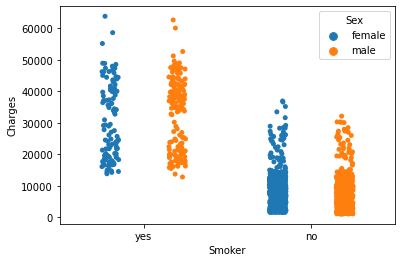

In [33]:
sns.stripplot(x = 'Smoker', y= 'Charges', data = df, hue = 'Sex', jitter = True, dodge = True)
# This plot is showing that sex doesnt really matter but the charges are higher for smokers compared to non smokers 

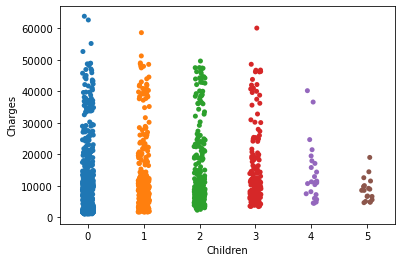

In [38]:
sns.stripplot(x = 'Children', y = 'Charges', data = df, jitter = True)# hue = 'Sex', dodge = True)

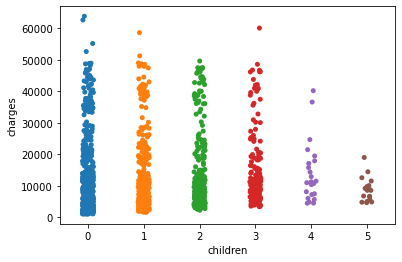

In [5]:
sns.stripplot(x = 'children', y = 'charges', data = df, jitter = True, dodge = True)

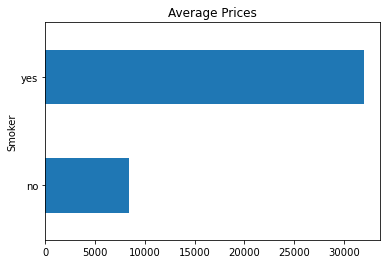

In [40]:
df_prices = df.groupby("Smoker").agg([np.mean])
buddy = df_prices['Charges']
buddy
buddy.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Prices")

# This plot is showing the average medical costs for smokers compared to non smokers and i think that it shows it in a clearer way then in the graph above 

                Age        BMI       Charges
               mean       mean          mean
Children                                    
0         38.444251  30.550296  12365.975602
1         39.453704  30.623148  12731.171832
2         39.445833  30.978104  15073.563734
3         41.566879  30.684331  15355.318367
4         39.000000  31.391200  13850.656311
5         35.611111  29.605000   8786.035247


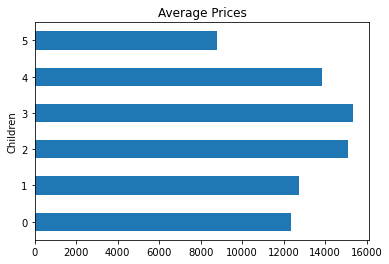

In [72]:
df_prices_children = df.groupby("Children").agg([np.mean])
print(df_prices_children)
charge = df_prices_children['Charges']
age = df_prices_children['Age']
charge.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Prices")

#This is giving me the Charges based on the number of kids and is showing me that they are highest at three and then the lowest at 5 which i kinda of interesting
#The bmi in this seems to be around the same so it doesnt change based on the number of kids 

In [73]:
df_prices = df.groupby("Sex") #.agg([np.mean])
df_prices.count()
sns.lineplot(data=df, palette="tab10", linewidth=2.5, hue = 'Sex')
#bmi = df_prices['BMI']
#bmi.count()
#bmi.plot(kind = "barh", y = "mean", legend = False, 
#            title = "Average Prices")
#df_prices_children
#sns.stripplot(x = 'Sex', y = 'BMI', data = df_prices_children, jitter = True)# hue = 'Sex', dodge = True)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

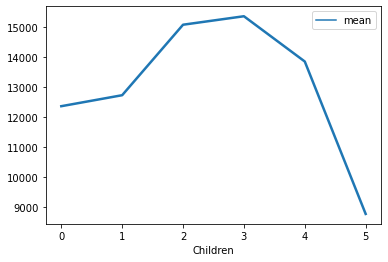

In [48]:
sns.lineplot(data=charge, palette="tab10", linewidth=2.5)
# This is just a different graph displaying the data above 

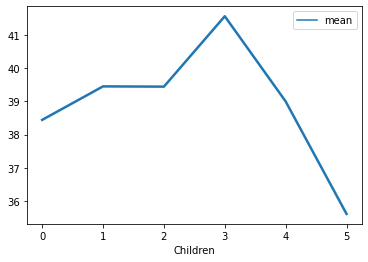

In [51]:
sns.lineplot(data=age, palette="tab10", linewidth=2.5)
# I find this interesting that the age when compared with the children follows almost the same line as the charges when compared to the children 

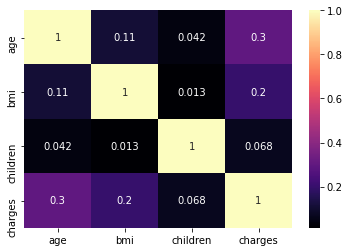

In [156]:
df_mx = df.corr()
sns.heatmap(df_mx, annot = True, cmap = 'magma')



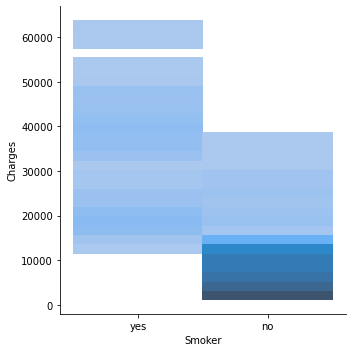

In [53]:
sns.displot(df, x = 'Smoker', y= 'Charges')

#This is just showing more data when comparing smoking on charges it shows that when smoking the charges are a lot more spread out but when comparing the non-smokers the charges
# are alot more heavily weighted to the bottom with most people having charges less than 10000 dollars

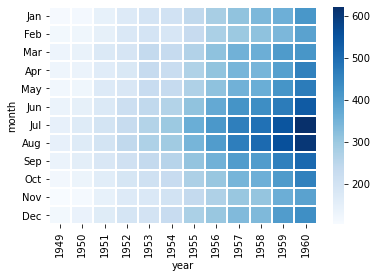

In [54]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns = 'year', values = 'passengers')
sns.heatmap(flights, cmap = 'Blues', linecolor='white', linewidth = 1)

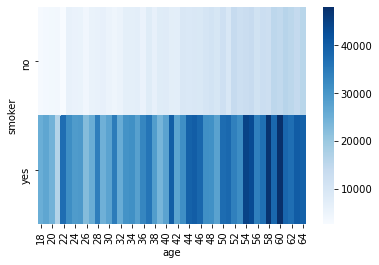

In [166]:
medical = df.pivot_table(columns = 'age', values = 'charges', index = 'smoker')
sns.heatmap(medical, cmap = 'Blues', linecolor='white')

# Again another graph showing the correlation between smokers and non-smokers i feel like this is an obvious correlation so probably wont have the research question centered
# around this. 